In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings as wn
wn.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

# Dataset Description

* **FAVC:** Frequent Consumption of High-caloric Food
* **FCVC:** Frequency of Consumption of Vegetables
* **NCP:** Number of Main Meals
* **CAEC:**: Consumption of Food Between Meals
* **SMOKE:** Smoking Habit
* **CH2O:** Daily Water Consumption
* **SCC:** Calories Consumption Monitoring
* **FAF:** Physical Activity Frequency
* **TUE:** Time Using Technology Devices
* **CALC:** Calories Consumption Monitoring
* **MTRANS:** Mode of Transportation
* **NObeyesdad:** Classification of Obesity Risk or Weight Status

In [3]:
train_df.shape,test_df.shape

((20758, 18), (13840, 17))

In [4]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

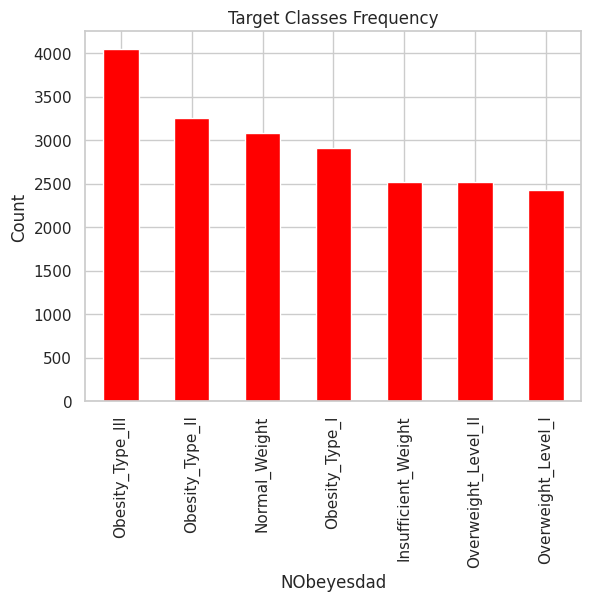

In [7]:
sns.set(style='whitegrid')
plt.title('Target Classes Frequency')
train_df['NObeyesdad'].value_counts().plot(kind='bar',color='red')
plt.ylabel('Count')
plt.show()

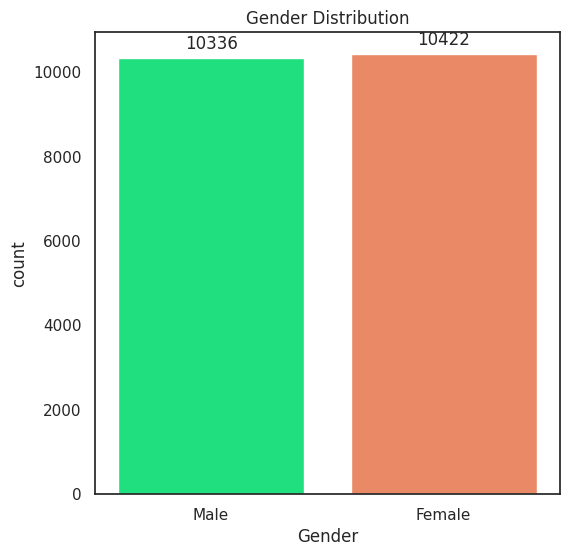

In [8]:
sns.set(style='white')
plt.figure(figsize=(6,6))
plt.title('Gender Distribution')
ax = sns.countplot(data=train_df, x='Gender', palette=['springgreen', 'coral'])

# Adding annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

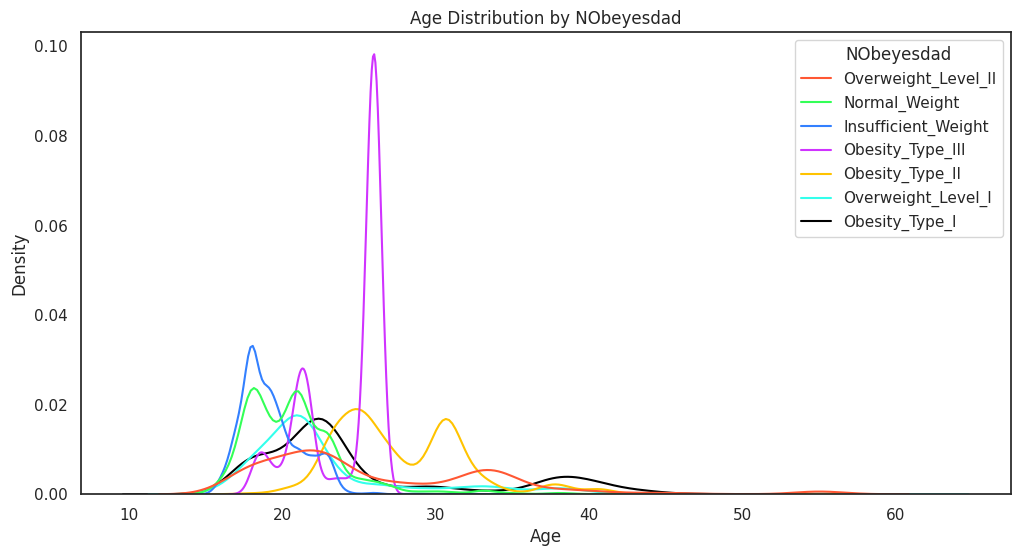

In [9]:
# now Check the age distribution
custom_palette = ['#FF5733', '#33FF57', '#3380FF', '#D033FF', '#FFC300', '#33FFEC', 'black']
plt.figure(figsize=(12,6))
plt.title('Age Distribution by NObeyesdad')
sns.kdeplot(data= train_df, x = 'Age',fill=False, hue='NObeyesdad', palette=custom_palette)
plt.show()

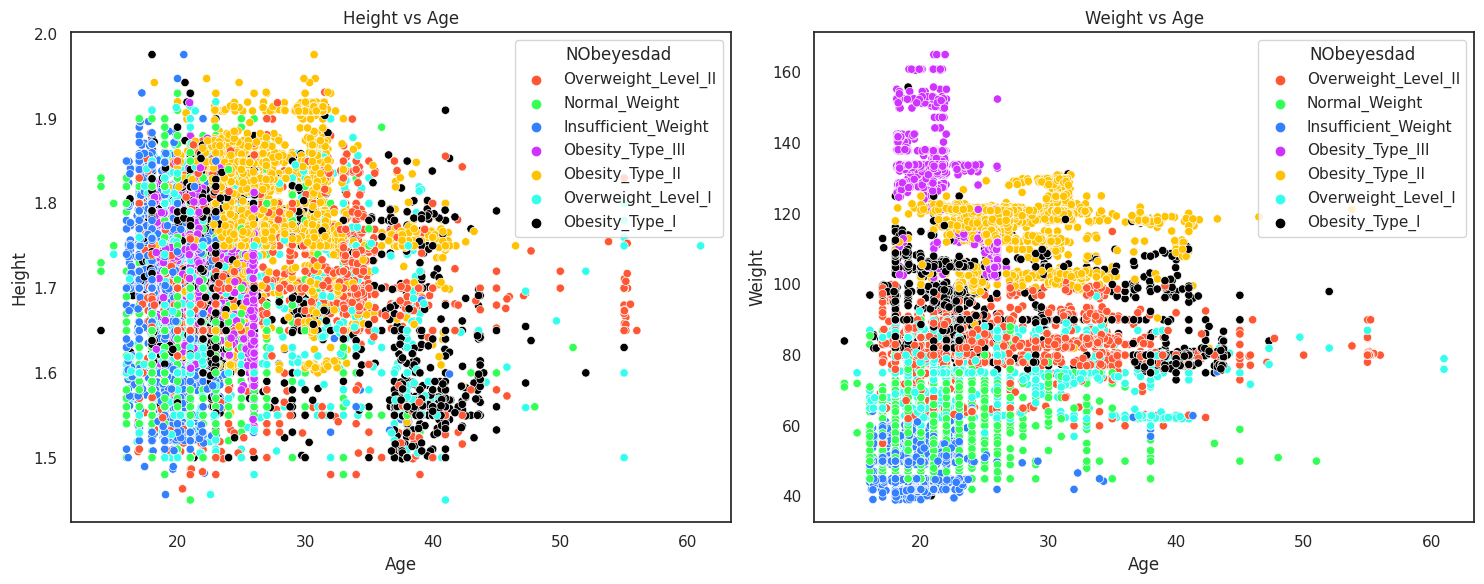

In [10]:
# Define a custom color palette with high contrast colors
custom_palette = ['#FF5733', '#33FF57', '#3380FF', '#D033FF', '#FFC300', '#33FFEC', 'black']

plt.figure(figsize=(15, 6))
cols = ['Height', 'Weight']
titles = ['Height vs Age', 'Weight vs Age']

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=train_df, x='Age', y=col, hue='NObeyesdad', palette=custom_palette)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

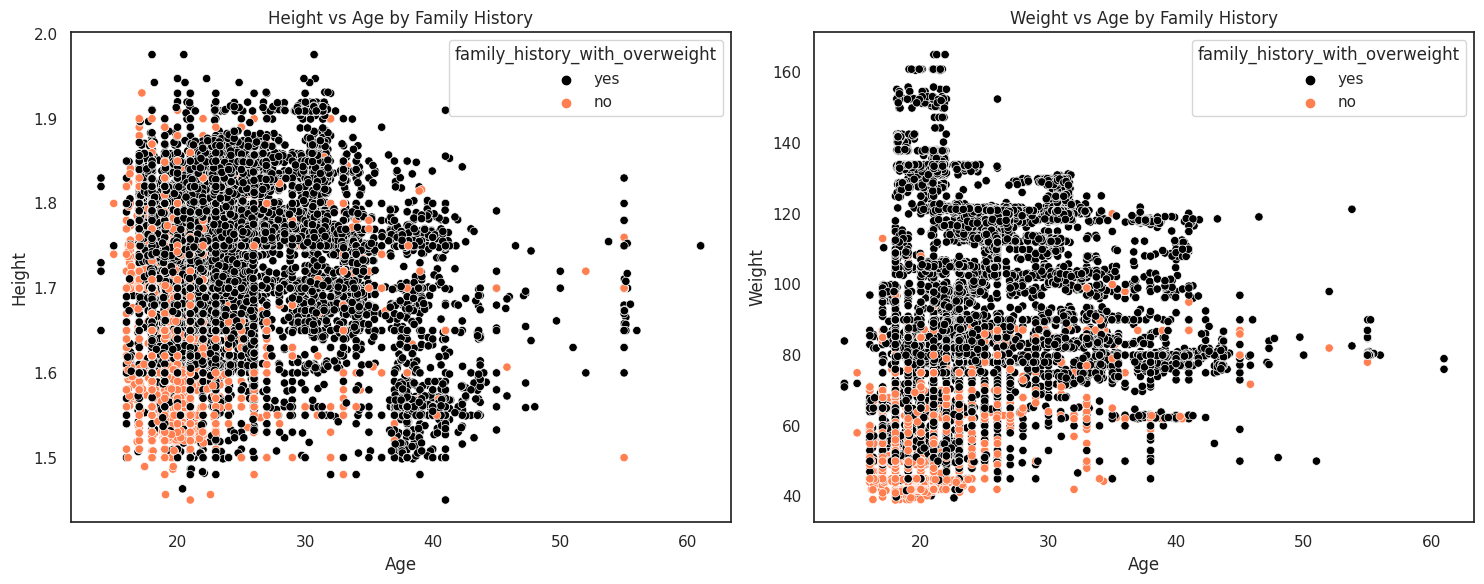

In [11]:
# Define a custom color palette with high contrast colors
custom_palette = ['black', 'coral']

plt.figure(figsize=(15, 6))
cols = ['Height', 'Weight']
titles = ['Height vs Age by Family History', 'Weight vs Age by Family History']

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=train_df, x='Age', y=col, hue='family_history_with_overweight', palette=custom_palette)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

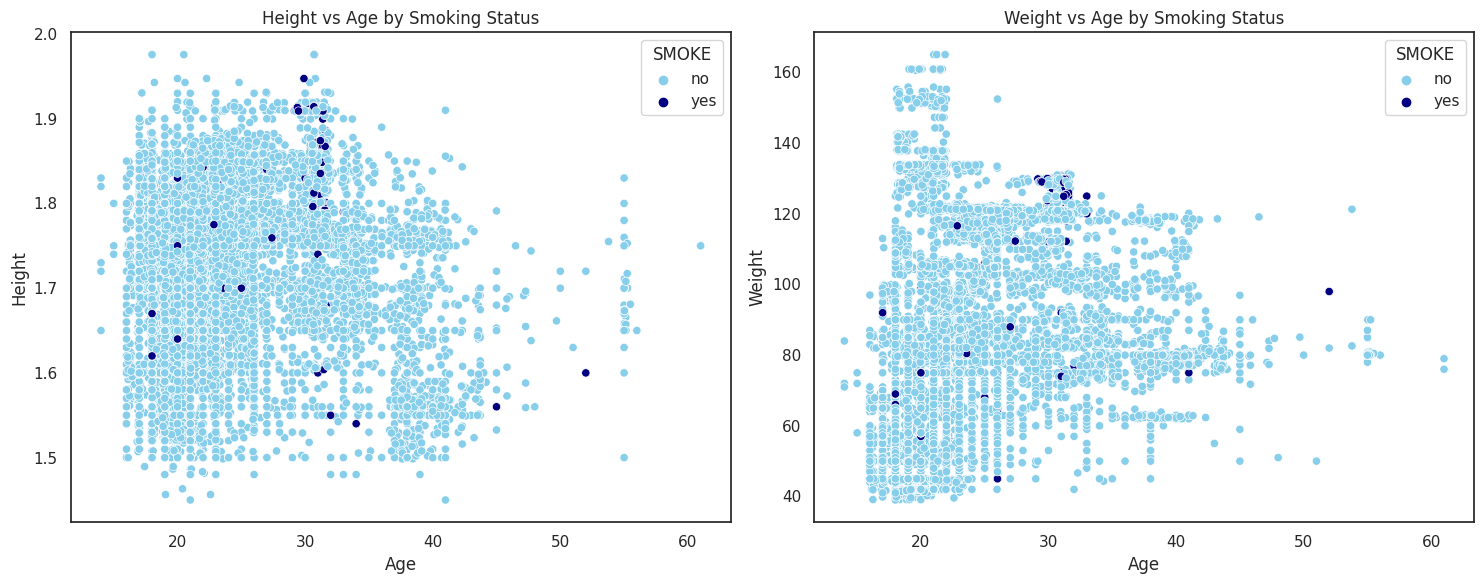

In [12]:
# Define a custom color palette with high contrast colors
custom_palette = ['skyblue', 'navy']

plt.figure(figsize=(15, 6))
cols = ['Height', 'Weight']
titles = ['Height vs Age by Smoking Status', 'Weight vs Age by Smoking Status']

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=train_df, x='Age', y=col, hue='SMOKE', palette=custom_palette)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

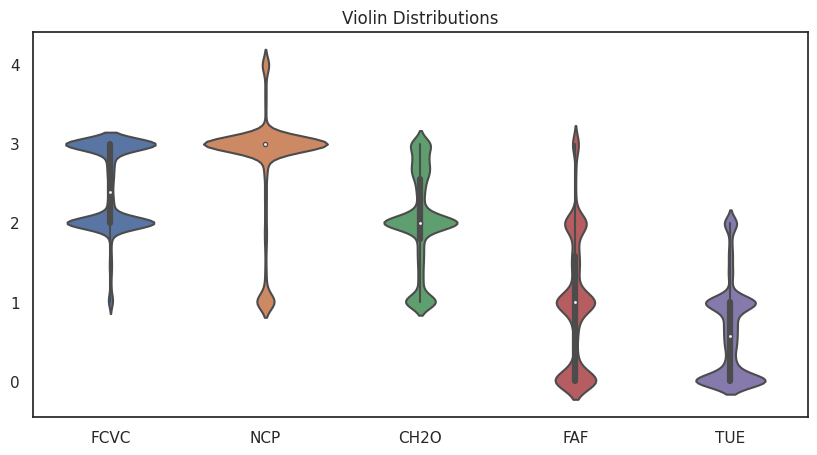

In [13]:
plt.figure(figsize=(10,5))
plt.title('Violin Distributions')
sns.violinplot(train_df[['FCVC','NCP','CH2O','FAF','TUE']])
plt.show()

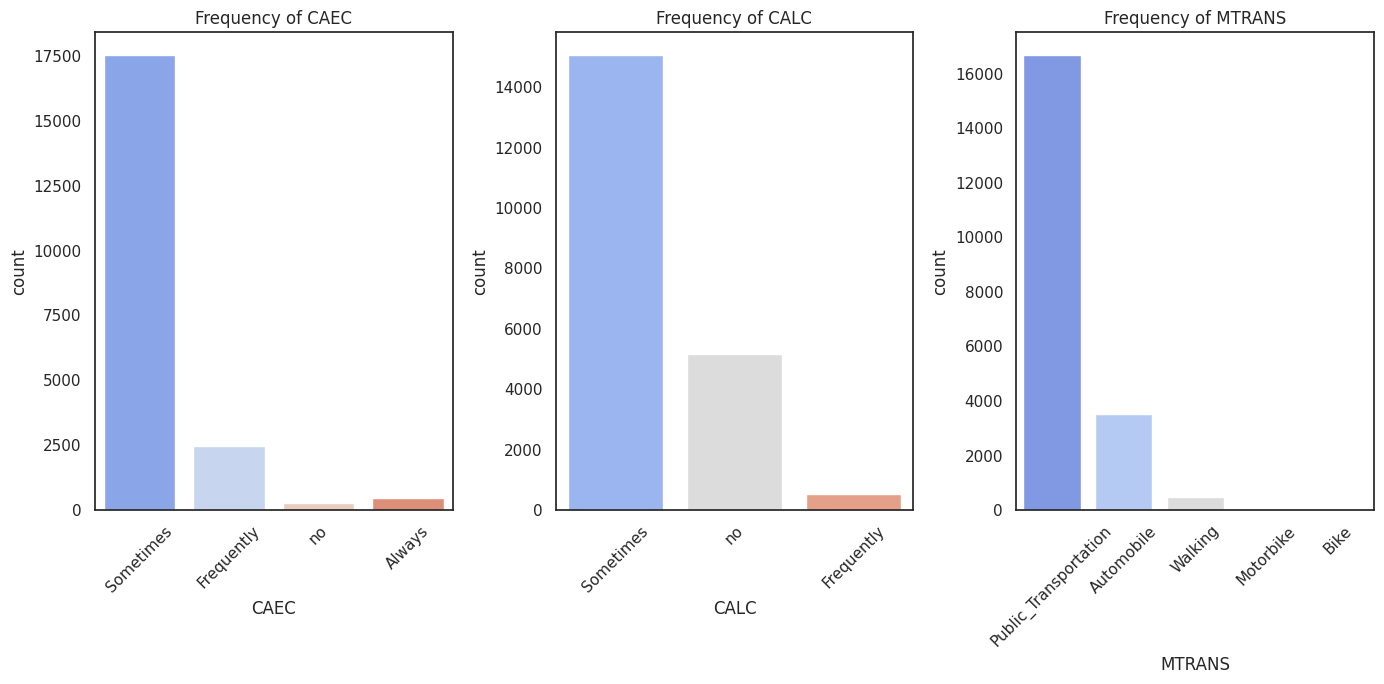

In [14]:
cols = ['CAEC', 'CALC', 'MTRANS']
plt.figure(figsize=(14, 7))
for i, col in enumerate(cols):
    plt.subplot(1, 3, (i + 1))
    sns.countplot(data=train_df, x=col, palette='coolwarm')
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

In [16]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
train_df.drop('id',axis=1,inplace=True)

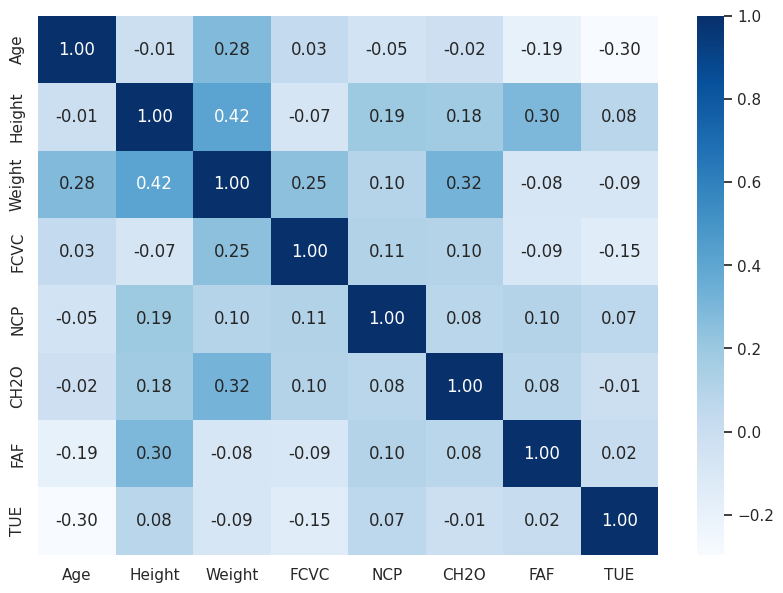

In [18]:
num_cols = train_df.dtypes[(train_df.dtypes==float)|(train_df.dtypes==int)].index.tolist()
plt.figure(figsize=(10,7))
sns.heatmap(train_df[num_cols].corr(),annot=True, fmt='.2f',cmap='Blues')
plt.show()

In [19]:
x_ = train_df[num_cols]
y_ = train_df['NObeyesdad']

In [20]:
x_.shape, y_.shape

((20758, 8), (20758,))

In [21]:
selector = SelectKBest(f_classif, k=8)
best_select_x = selector.fit_transform(x_, y_)

In [22]:
selected_features_mask = selector.get_support()
# Get the names of all features
all_feature_names = list(x_.columns)
# Filter out the dropped features
selected_features = [feature for feature, selected in zip(all_feature_names, selected_features_mask) if selected]
dropped_features = [feature for feature, selected in zip(all_feature_names, selected_features_mask) if not selected]

print("Selected features:", selected_features)
print("Dropped features:", dropped_features)

Selected features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Dropped features: []


In [23]:
train_df.drop(columns=dropped_features, axis=1, inplace=True)
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# Preprocessing

In [24]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
x = train_df.drop('NObeyesdad',axis=1)
y = train_df['NObeyesdad']

In [27]:
x.shape

(20758, 16)

In [28]:
le = LabelEncoder()
x['CALC'] = le.fit_transform(x['CALC'])

In [29]:
x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,1,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,2,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,2,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,1,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,1,Public_Transportation


In [30]:
object_column_indices = x.select_dtypes(include=['object']).columns.tolist()
indices = [x.columns.get_loc(col) for col in object_column_indices]

In [31]:
indices

[0, 4, 5, 8, 9, 11, 15]

In [32]:
oneHotEn = ColumnTransformer([
    ('oneHot',OneHotEncoder(),indices)
],remainder='passthrough')
oneHotEn

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHot', OneHotEncoder(),
                                 [0, 4, 5, 8, 9, 11, 15])])

In [33]:
x = oneHotEn.fit_transform(x)
x[0]

array([ 0.      ,  1.      ,  0.      ,  1.      ,  0.      ,  1.      ,
        0.      ,  0.      ,  1.      ,  0.      ,  1.      ,  0.      ,
        1.      ,  0.      ,  0.      ,  0.      ,  0.      ,  1.      ,
        0.      , 24.443011,  1.699998, 81.66995 ,  2.      ,  2.983297,
        2.763573,  0.      ,  0.976473,  1.      ])

In [34]:
x.shape

(20758, 28)

In [35]:
minMaxScl = MinMaxScaler()
x = minMaxScl.fit_transform(x)

In [36]:
x.shape

(20758, 28)

In [37]:
# StdScl = StandardScaler()
# x = StdScl.fit_transform(x)

In [38]:
x[0]

array([0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.22219172,
       0.47558607, 0.33849654, 0.5       , 0.661099  , 0.8817865 ,
       0.        , 0.4882365 , 0.5       ])

In [39]:
y_le = LabelEncoder()
y = y_le.fit_transform(y)

In [40]:
train_df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [41]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([2523, 3082, 2910, 3248, 4046, 2427, 2522]))

In [42]:
x.shape

(20758, 28)

# Data Modeling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [44]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
x_train.shape, x_test.shape

((18682, 28), (2076, 28))

In [45]:
model = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = AdaBoostClassifier()
model4 = xgb.XGBClassifier()
model.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
scores = [model2.score(x_test,y_test),model.score(x_test,y_test),model3.score(x_test,y_test)]
scores

[0.9036608863198459, 0.8896917148362236, 0.4291907514450867]

In [47]:
model4.score(x_test,y_test)

0.9807321772639692

# Predictive Analysis

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc

In [49]:
y_pred1 = model2.predict(x_test)
y_pred2 = model.predict(x_test)

In [50]:
pred = [y_pred1,y_pred2]

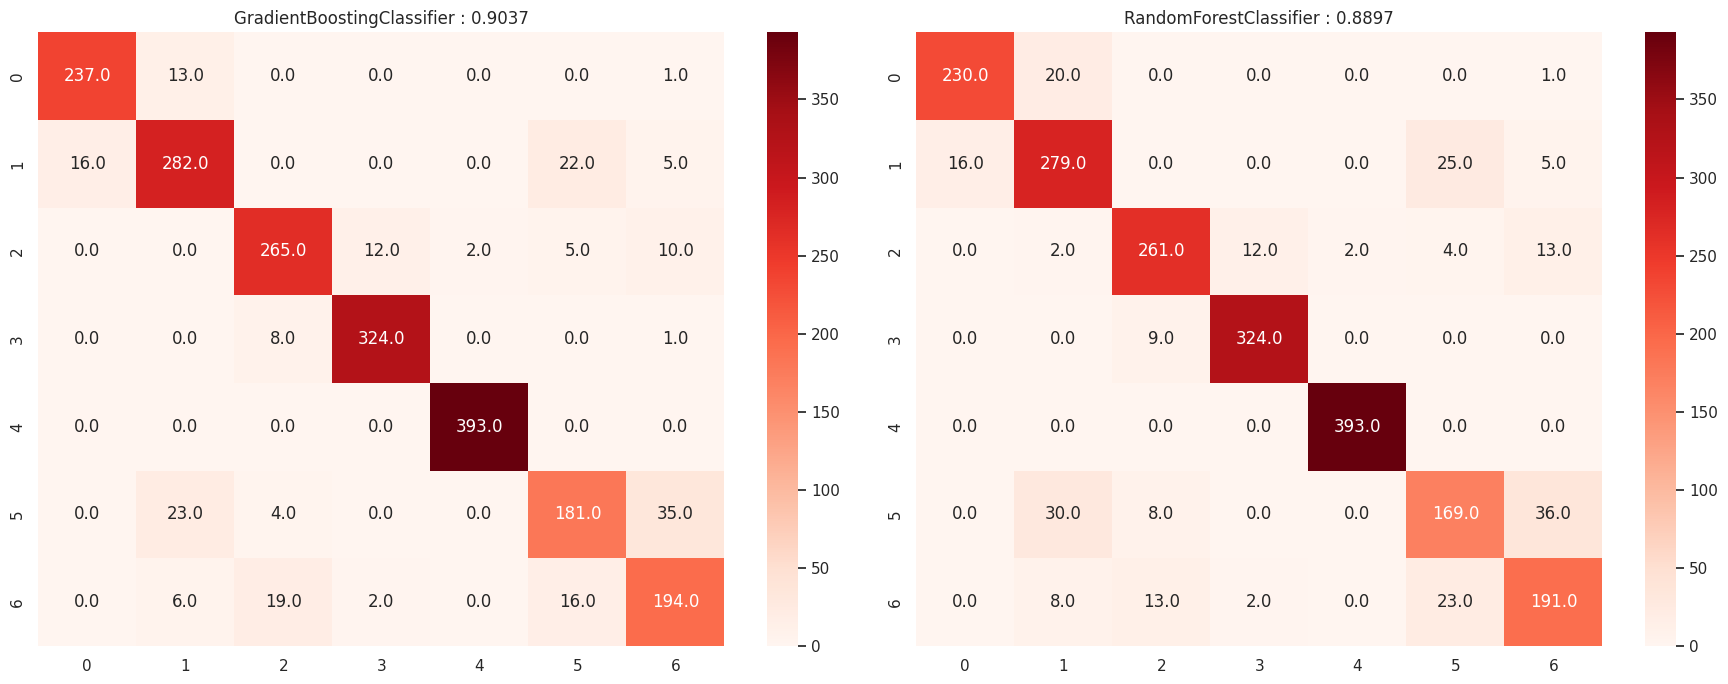

In [51]:
titles = ['GradientBoostingClassifier','RandomForestClassifier']
plt.figure(figsize=(18,7))
for i,pred in enumerate(pred):
    plt.subplot(1,2,i+1)
    mat = confusion_matrix(y_test,pred)
    sns.heatmap(mat, annot=True,fmt='.1f',cmap='Reds')
    plt.title(label=f'{titles[i]} : {np.round(scores[i],4)}')
plt.tight_layout()
plt.show()
    

In [52]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       251
           1       0.87      0.87      0.87       325
           2       0.90      0.90      0.90       294
           3       0.96      0.97      0.97       333
           4       0.99      1.00      1.00       393
           5       0.81      0.74      0.78       243
           6       0.79      0.82      0.80       237

    accuracy                           0.90      2076
   macro avg       0.89      0.89      0.89      2076
weighted avg       0.90      0.90      0.90      2076



AUC Score: 0.9876086678888829
Accuracy: 0.9036608863198459


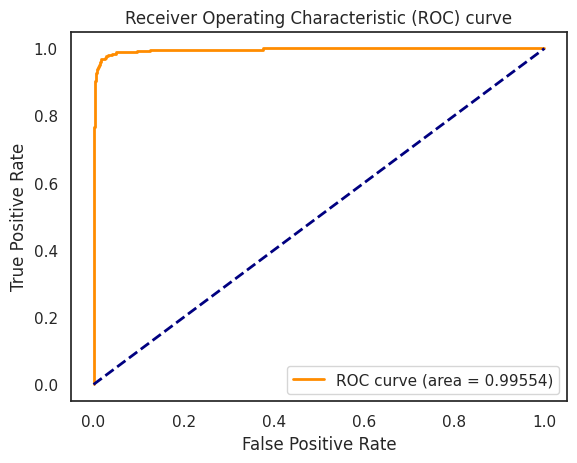

In [53]:
y_probs = model2.predict_proba(x_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')

# Get predicted classes
y_pred = model2.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)

print("AUC Score:", auc_score)
print("Accuracy:", acc)

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# For Testset

In [54]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [56]:
test_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [57]:
test_df_id = test_df['id']
test_df.drop('id',axis=1,inplace=True)
test_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [58]:
test_df['CALC'] = le.fit_transform(test_df['CALC'])

In [59]:
# use column transformer
test_set = oneHotEn.fit_transform(test_df)
test_set[0]

array([  0.      ,   1.      ,   0.      ,   1.      ,   0.      ,
         1.      ,   0.      ,   0.      ,   1.      ,   0.      ,
         1.      ,   0.      ,   1.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   1.      ,   0.      ,  26.899886,
         1.848294, 120.644178,   2.938616,   3.      ,   2.825629,
         0.8554  ,   0.      ,   2.      ])

In [60]:
test_set.shape

(13840, 28)

In [61]:
scl_test_ds = minMaxScl.fit_transform(test_set)
scl_test_ds[0]

array([0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.27446566,
       0.75149811, 0.64767529, 0.969308  , 0.66666667, 0.9128145 ,
       0.28513333, 0.        , 0.66666667])

In [62]:
scl_test_ds.shape

(13840, 28)

In [63]:
pred = model4.predict(scl_test_ds)

In [64]:
label_pred = y_le.inverse_transform(pred)

In [65]:
dic = {'id':test_df_id, 'NObeyesdad': label_pred}
final_sub = pd.DataFrame(dic)
final_sub.head(10)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight
7,20765,Normal_Weight
8,20766,Overweight_Level_II
9,20767,Normal_Weight


In [66]:
final_sub.to_csv('submission.csv',index=False)

In [67]:
final_sub.shape

(13840, 2)